In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=9d358e427b937472d82a419542ea341fffa7c36119f2bab8d4e8d53d18b48a64
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pyspark
from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F

import pandas as pd

spark= SparkSession \
       .builder \
       .appName("Lab project") \
       .getOrCreate()

In [5]:
file_path = '/content/drive/My Drive/additional_data/job_summary_measures.csv'  # Update the path accordingly

job_summary_measures_spk = spark.read.format("csv").option("header", "true") \
    .option("delimiter", ",") \
    .option("multiline", "true") \
    .option("quote", "\"") \
    .option("escape", "\"") \
    .option("encoding", "UTF-8")\
    .load(file_path)

# job_summary_measures_spk = job_summary_measures_spk.sample(False, 100040/440769, seed=85)

In [ ]:
meta_industries_12 = {
    'Furniture and Home Furnishings Manufacturing': 'Manufacturing',
    'Investment Banking': 'Financial and Investment',
    'Architecture and Planning': 'Services',
    'Wholesale': 'Services',
    'Travel Arrangements': 'Services',
    'Ranching': 'Miscellaneous',
    'Hospitals and Health Care': 'Healthcare and Medical',
    'Book and Periodical Publishing': 'Services',
    'Printing Services': 'Services',
    'Professional Training and Coaching': 'Services',
    'Computers and Electronics Manufacturing': 'Manufacturing',
    'Shipbuilding': 'Manufacturing',
    'Public Policy Offices': 'Government and Public Policy',
    'Software Development': 'Technology',
    'Outsourcing and Offshoring Consulting': 'Services',
    'Retail Groceries': 'Retail and Consumer Goods',
    'Education Administration Programs': 'Education and Training',
    'Plastics Manufacturing': 'Manufacturing',
    'Renewable Energy Semiconductor Manufacturing': 'Manufacturing',
    'Computer Networking Products': 'Technology',
    'Events Services': 'Services',
    'Information Services': 'Services',
    'Food and Beverage Services': 'Services',
    'Semiconductor Manufacturing': 'Manufacturing',
    'Business Consulting and Services': 'Services',
    'Insurance': 'Services',
    'Financial Services': 'Services',
    'Wireless Services': 'Services',
    'Computer Hardware Manufacturing': 'Technology',
    'Public Safety': 'Services',
    'Maritime Transportation': 'Transportation and Logistics',
    'Tobacco Manufacturing': 'Manufacturing',
    'Writing and Editing': 'Services',
    'Veterinary Services': 'Services',
    'Staffing and Recruiting': 'Services',
    'Accounting': 'Services',
    'International Affairs': 'Government and Public Policy',
    'Spectator Sports': 'Miscellaneous',
    'Glass, Ceramics and Concrete Manufacturing': 'Manufacturing',
    'Chemical Manufacturing': 'Manufacturing',
    'Mining': 'Miscellaneous',
    'E-Learning Providers': 'Technology',
    'Security and Investigations': 'Services',
    'Translation and Localization': 'Services',
    'Automation Machinery Manufacturing': 'Technology',
    'Computer and Network Security': 'Technology',
    'Political Organizations': 'Government and Public Policy',
    'Environmental Services': 'Government and Public Policy',
    'Oil and Gas': 'Miscellaneous',
    'Real Estate': 'Real Estate and Construction',
    'Think Tanks': 'Government and Public Policy',
    'Executive Offices': 'Miscellaneous',
    'Law Practice': 'Services',
    'Nanotechnology Research': 'Miscellaneous',
    'International Trade and Development': 'Government and Public Policy',
    'Personal Care Product Manufacturing': 'Manufacturing',
    'Philanthropic Fundraising Services': 'Services',
    'Entertainment Providers': 'Media and Entertainment',
    'Market Research': 'Media and Entertainment',
    'Movies, Videos, and Sound': 'Media and Entertainment',
    'Sporting Goods Manufacturing': 'Manufacturing',
    'Graphic Design': 'Services',
    'Technology, Information and Internet': 'Technology',
    'IT Services and IT Consulting': 'Technology',
    'Retail Office Equipment': 'Retail and Consumer Goods',
    'Wholesale Import and Export': 'Services',
    'Capital Markets': 'Financial and Investment',
    'Law Enforcement': 'Services',
    'Freight and Package Transportation': 'Transportation and Logistics',
    'Industrial Machinery Manufacturing': 'Manufacturing',
    'Non-profit Organizations': 'Miscellaneous',
    'Retail Art Supplies': 'Retail and Consumer Goods',
    'Animation and Post-production': 'Media and Entertainment',
    'Transportation, Logistics, Supply Chain and Storage': 'Transportation and Logistics',
    'Aviation and Aerospace Component Manufacturing': 'Transportation and Logistics',
    'Fundraising': 'Financial and Investment',
    'Railroad Equipment Manufacturing': 'Transportation and Logistics',
    'Construction': 'Real Estate and Construction',
    'Investment Management': 'Financial and Investment',
    'Utilities': 'Miscellaneous',
    'Retail Luxury Goods and Jewelry': 'Retail and Consumer Goods',
    'Warehousing and Storage': 'Transportation and Logistics',
    'Media Production': 'Media and Entertainment',
    'Gambling Facilities and Casinos': 'Media and Entertainment',
    'Defense and Space Manufacturing': 'Manufacturing',
    'Facilities Services': 'Services',
    'Government Relations Services': 'Government and Public Policy',
    'Advertising Services': 'Media and Entertainment',
    'Paper and Forest Product Manufacturing': 'Manufacturing',
    'Packaging and Containers Manufacturing': 'Manufacturing',
    'Telecommunications': 'Technology',
    'Medical Equipment Manufacturing': 'Healthcare and Medical',
    'Beverage Manufacturing': 'Manufacturing',
    'Restaurants': 'Retail and Consumer Goods',
    'Leasing Non-residential Real Estate': 'Real Estate and Construction',
    'Newspaper Publishing': 'Media and Entertainment',
    'Armed Forces': 'Miscellaneous',
    'Appliances, Electrical, and Electronics Manufacturing': 'Manufacturing',
    'Hospitality': 'Services',
    'Pharmaceutical Manufacturing': 'Healthcare and Medical',
    'Research Services': 'Services',
    'Retail Apparel and Fashion': 'Retail and Consumer Goods',
    'Photography': 'Media and Entertainment',
    'Wellness and Fitness Services': 'Services',
    'Truck Transportation': 'Transportation and Logistics',
    'Consumer Services': 'Services',
    'Wholesale Building Materials': 'Services',
    'Human Resources Services': 'Services',
    'Airlines and Aviation': 'Transportation and Logistics',
    'Machinery Manufacturing': 'Manufacturing',
    'Individual and Family Services': 'Services',
    'Motor Vehicle Manufacturing': 'Manufacturing',
    'Performing Arts': 'Media and Entertainment',
    'Museums, Historical Sites, and Zoos': 'Media and Entertainment',
    'Broadcast Media Production and Distribution': 'Media and Entertainment',
    'Banking': 'Financial and Investment',
    'Recreational Facilities': 'Miscellaneous',
    'Government Administration': 'Government and Public Policy',
    'Public Relations and Communications Services': 'Media and Entertainment',
    'Fisheries': 'Miscellaneous',
    'Medical Practices': 'Healthcare and Medical',
    'Religious Institutions': 'Miscellaneous',
    'Online Audio and Video Media': 'Media and Entertainment',
    'Artists and Writers': 'Miscellaneous',
    'Biotechnology Research': 'Healthcare and Medical',
    'Legal Services': 'Services',
    'Retail': 'Retail and Consumer Goods',
    'Civil Engineering': 'Services',
    'Libraries': 'Miscellaneous',
    'Alternative Dispute Resolution': 'Miscellaneous',
    'Manufacturing': 'Miscellaneous',
    'Design Services': 'Services',
    'Dairy Product Manufacturing': 'Manufacturing',
    'Higher Education': 'Education and Training',
    'Civic and Social Organizations': 'Miscellaneous',
    'Textile Manufacturing': 'Manufacturing',
    'Venture Capital and Private Equity Principals': 'Financial and Investment',
    'Mental Health Care': 'Healthcare and Medical',
    'Musicians': 'Media and Entertainment',
    'Farming': 'Miscellaneous',
    'Computer Games': 'Media and Entertainment',
    'Strategic Management Services': 'Services',
    'Food and Beverage Manufacturing': 'Manufacturing',
    'Primary and Secondary Education': 'Education and Training',
    'Alternative Medicine': 'Healthcare and Medical',
    'Legislative Offices': 'Services',
    'Administration of Justice': 'Services',
    'Mobile Gaming Apps': 'Media and Entertainment'
}

In [7]:
# Load the Excel file into a DataFrame
excel_file = '/content/drive/My Drive/additional_data/keywords_meta.csv'  # Update the file path
df = pd.read_csv(excel_file)  # You can specify sheet_name if there are multiple sheets


In [8]:
df = df[df['row_number']<=10]
industry_keywords_dict = df.groupby('meta_industry')['keyword'].apply(list).to_dict()

In [ ]:
from pyspark.sql.functions import isnan, when, count, col

In [ ]:
job_summary_measures_spk.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in ['job_summary']]).show()

+-----------+
|job_summary|
+-----------+
|          0|
+-----------+



In [ ]:
import nltk
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType, ArrayType, IntegerType
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Prepare lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if text is None:
        return []
    # Tokenize, remove punctuation and stopwords, and lemmatize
    tokens = nltk.word_tokenize(text.lower())
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word not in string.punctuation]
    return lemmatized

# Register UDF for Spark
preprocess_udf = udf(preprocess_text, ArrayType(StringType()))


In [ ]:
job_summary_measures_spk1 = job_summary_measures_spk.withColumn('processed_summary', preprocess_udf(job_summary_measures_spk['job_summary']))


In [ ]:
def count_keywords(summary, keyword_dict):
    if not summary:
        return 0 #"None,0"
    industry_counts = {industry: sum(word in summary for word in keywords) for industry, keywords in keyword_dict.items()}
    max_industry = max(industry_counts, key=industry_counts.get)
    max_count = industry_counts[max_industry]
    return max_count #f"{max_industry},{max_count}"

def max_industry(summary, keyword_dict):
    if not summary:
        return 0 #"None,0"
    industry_counts = {industry: sum(word in summary for word in keywords) for industry, keywords in keyword_dict.items()}
    max_industry = max(industry_counts, key=industry_counts.get)
    max_count = industry_counts[max_industry]
    return max_industry #f"{max_industry},{max_count}"

# Register UDF
count_keywords_udf = udf(lambda x: count_keywords(x, industry_keywords_dict), IntegerType())
max_industry_udf = udf(lambda x: max_industry(x, industry_keywords_dict), StringType())

# Add new column with the industry having the most keywords and the count
job_summary_measures_spk2 = job_summary_measures_spk1.withColumn('keyword_density', count_keywords_udf(job_summary_measures_spk1['processed_summary']))
job_summary_measures_spk2 = job_summary_measures_spk2.withColumn('meta_industry', max_industry_udf(job_summary_measures_spk1['processed_summary']))


In [ ]:
job_summary_measures_spk2.select('meta_industry','keyword_density', 'job_summary').show(truncate=False)


+-------------+---------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
job_summary_measures_spk2.groupBy('meta_industry').count().orderBy('count').show()

+--------------------+-----+
|       meta_industry|count|
+--------------------+-----+
|Government and Pu...|    1|
|          Technology|    7|
|Education and Tra...|   23|
|Transportation an...|   41|
|Healthcare and Me...|  127|
|       Miscellaneous|  133|
|       Manufacturing|  320|
|Media and Enterta...|  955|
|            Services|98393|
+--------------------+-----+



In [ ]:
job_summary_measures_spk2 = job_summary_measures_spk2.drop('processed_summary')

In [ ]:
job_summary_measures_spk2 = job_summary_measures_spk2.withColumn("summary_length", job_summary_measures_spk2["summary_length"].cast(IntegerType()))
job_summary_measures_spk2 = job_summary_measures_spk2.withColumn("summary_newline_count", job_summary_measures_spk2["summary_newline_count"].cast(IntegerType()))
job_summary_measures_spk2 = job_summary_measures_spk2.withColumn("readability_score", job_summary_measures_spk2["readability_score"].cast(IntegerType()))
job_summary_measures_spk2 = job_summary_measures_spk2.withColumn("numeric_sentiment", job_summary_measures_spk2["numeric_sentiment"].cast(IntegerType()))

In [ ]:
from pyspark.sql.window import Window



# Define the window specification
windowSpec = Window.partitionBy("meta_industry")

# Compute the maximum value per category
max_value = F.max("keyword_density").over(windowSpec)

# Create a new column with the value divided by the max value in its category
job_summary_measures_spk2 = job_summary_measures_spk2.withColumn("keyword_density_norm", F.col("keyword_density") / max_value)



In [ ]:
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col, udf
from pyspark.sql.types import DoubleType
from pyspark.ml.linalg import VectorUDT, DenseVector

# Create a feature vector
assembler = VectorAssembler(inputCols=["summary_newline_count"], outputCol="features")
job_summary_measures_spk2 = assembler.transform(job_summary_measures_spk2)

# Apply Min-Max Scaler
scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")
scalerModel = scaler.fit(job_summary_measures_spk2)
job_summary_measures_spk2 = scalerModel.transform(job_summary_measures_spk2)


# UDF to extract an element from a vector
def extract_element(vec, index):
    try:
        return float(vec[index])
    except KeyError:
        return None

extract_element_udf = udf(extract_element, DoubleType())



# Extract scaled value
job_summary_measures_spk2 = job_summary_measures_spk2.withColumn("summary_newline_count_norm", extract_element_udf(col("scaled_features"), F.lit(0)))
job_summary_measures_spk2.select("summary_newline_count", "summary_newline_count_norm").show()


+---------------------+--------------------------+
|summary_newline_count|summary_newline_count_norm|
+---------------------+--------------------------+
|                   27|       0.04604051565377532|
|                   29|       0.04972375690607735|
|                   40|       0.06998158379373849|
|                   40|       0.06998158379373849|
|                   73|       0.13075506445672191|
|                   16|       0.02578268876611418|
|                   15|       0.02394106813996317|
|                   47|       0.08287292817679558|
|                   18|      0.029465930018416207|
|                   24|      0.040515653775322284|
|                   59|       0.10497237569060774|
|                   37|       0.06445672191528545|
|                   24|      0.040515653775322284|
|                   17|      0.027624309392265196|
|                   49|        0.0865561694290976|
|                   75|       0.13443830570902396|
|                   38|       0

In [ ]:
job_summary_measures_spk2 = job_summary_measures_spk2.drop('features','scaled_features')

In [119]:
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

# UDF to calculate normalized summary length
def calculate_summary_length_norm(length):
    if length <= 300:
        return 0.0
    elif length <= 660:
        return (length - 300) / 360.0
    else:
        return 1.0

# UDF to calculate normalized readability level
def calculate_readability_norm(level):
    if level <= 10:
        return 0.0
    elif level <= 30:
        return (level - 10) / 20.0
    else:
        return 1.0

# Register UDFs
summary_length_norm_udf = udf(lambda x: calculate_summary_length_norm(x), FloatType())
readability_norm_udf = udf(lambda x: calculate_readability_norm(x), FloatType())

# Adding normalized columns to DataFrame
job_summary_measures_spk2 = job_summary_measures_spk2.withColumn("summary_length_norm", summary_length_norm_udf(job_summary_measures_spk2["summary_length"]))
job_summary_measures_spk2 = job_summary_measures_spk2.withColumn("readability_norm", readability_norm_udf(job_summary_measures_spk2["readability_score"]))

# Define weights
weights = {
    "summary_length": 0.2,
    "newline_count": 0.1,
    "sentiment": 0.25,
    "readability": 0.2,
    "keyword_density": 0.25
}

# Calculate final attractivity score
job_summary_measures_spk2 = job_summary_measures_spk2.withColumn("attractivity_score",
                   weights["summary_length"] * job_summary_measures_spk2["summary_length_norm"] +
                   weights["newline_count"] * job_summary_measures_spk2["summary_newline_count_norm"]  +
                   weights["sentiment"] * job_summary_measures_spk2["numeric_sentiment"] +
                   weights["readability"] * job_summary_measures_spk2["readability_norm"] +
                   weights["keyword_density"] * job_summary_measures_spk2["keyword_density_norm"]
                                                )

In [120]:
from sklearn.preprocessing import StandardScaler

df = job_summary_measures_spk2.select(['job_link','summary_newline_count_norm',
 'numeric_sentiment',
 'keyword_density_norm',
 'summary_length_norm',
 'readability_norm','attractivity_score']).toPandas()
# Standardizing data
scaler = StandardScaler()


In [122]:
numeric_cols = ['summary_newline_count_norm', 'numeric_sentiment', 'keyword_density_norm',
                'summary_length_norm', 'readability_norm']  # update this list as per your dataframe
non_numeric_df = df[['job_link']]  # non-numeric DataFrame
numeric_df = df[numeric_cols]

In [123]:
# Standardizing the numeric columns

numeric_df_scaled = scaler.fit_transform(numeric_df)
numeric_df_scaled = pd.DataFrame(numeric_df_scaled, columns=numeric_cols)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

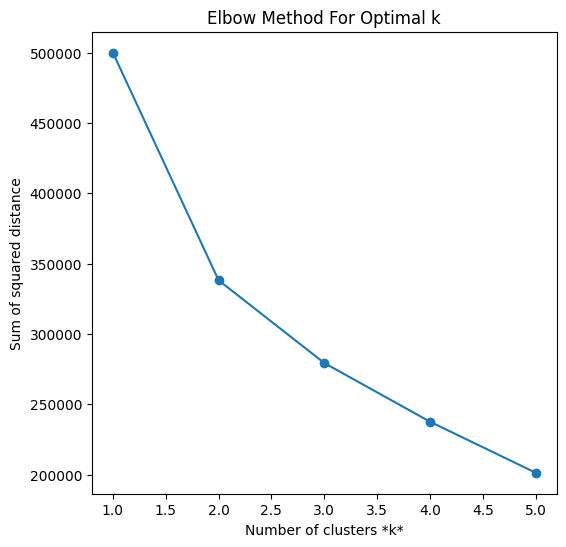

In [124]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df_scaled is the standardized data from the previous step

# Elbow method to determine k
sse = []
list_k = list(range(1, 6))
for k in list_k:
    km = KMeans(n_clusters=k,random_state=1)
    km.fit(numeric_df_scaled)
    sse.append(km.inertia_)

# Plot SSE for each *k*
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.title('Elbow Method For Optimal k')
plt.show()



In [125]:
# Fit K-means with an optimal number of clusters
k_optimal = sse.index(min(sse))+1  # Assuming 3 from the plot
kmeans = KMeans(n_clusters=k_optimal)
clusters = kmeans.fit_predict(numeric_df_scaled)
df['Cluster'] = clusters

# Check clusters
# df.style

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [126]:
# Group by the cluster label and calculate statistics
cluster_summary = df.groupby('Cluster')['attractivity_score'].agg(['mean', 'max', 'min', 'count'])
cluster_summary.style


,mean,max,min,count
Cluster,,,,
0,0.553078,0.772802,0.328216,26212
1,0.464940,0.642523,0.177939,18103
2,0.299719,0.533803,0.071173,18089
3,0.304590,0.638138,0.005294,14919
4,0.723606,0.919040,0.457293,22677


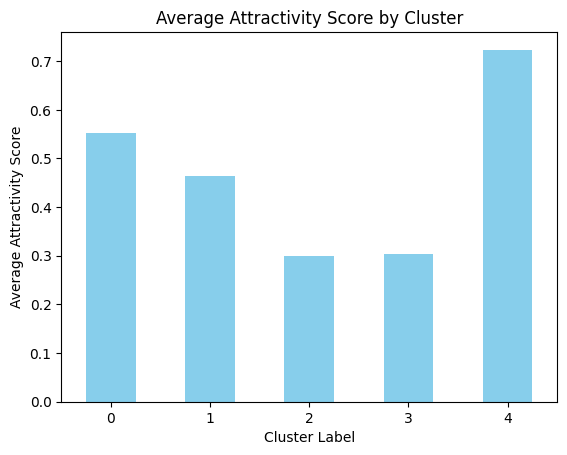

In [127]:
import matplotlib.pyplot as plt

# Plotting average attractivity scores for each cluster
cluster_summary['mean'].plot(kind='bar', color='skyblue')
plt.title('Average Attractivity Score by Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Average Attractivity Score')
plt.xticks(rotation=0)
plt.show()

In [128]:
# Group by 'cluster_label' and calculate summary statistics for each cluster
cluster_summary = df.groupby('Cluster').agg({
    'summary_newline_count_norm': ['mean', 'std', 'min', 'max'],
    'numeric_sentiment': ['mean', 'std', 'min', 'max'],
    'keyword_density_norm': ['mean', 'std', 'min', 'max'],
    'summary_length_norm': ['mean', 'std', 'min', 'max'],
    'readability_norm': ['mean', 'std', 'min', 'max'],
    'attractivity_score': ['mean', 'std', 'min', 'max']
}).reset_index()

# print(cluster_summary)

In [129]:
cluster_summary.style

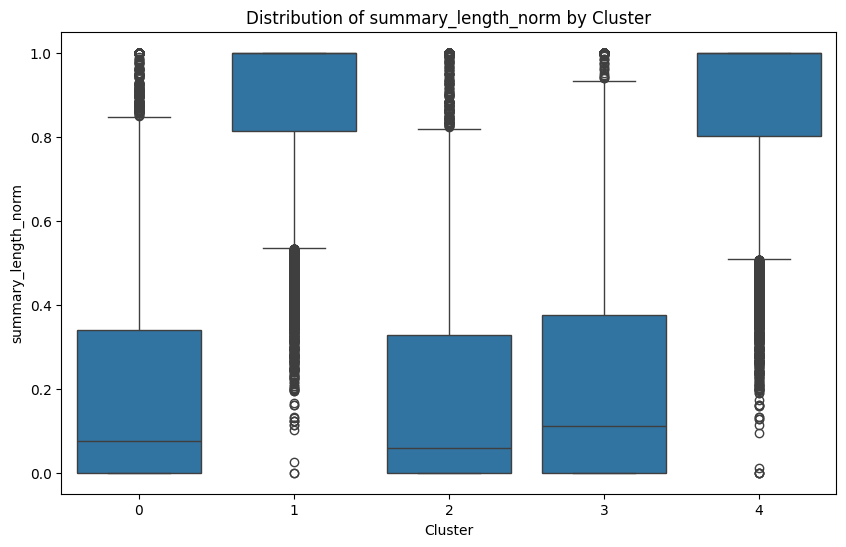

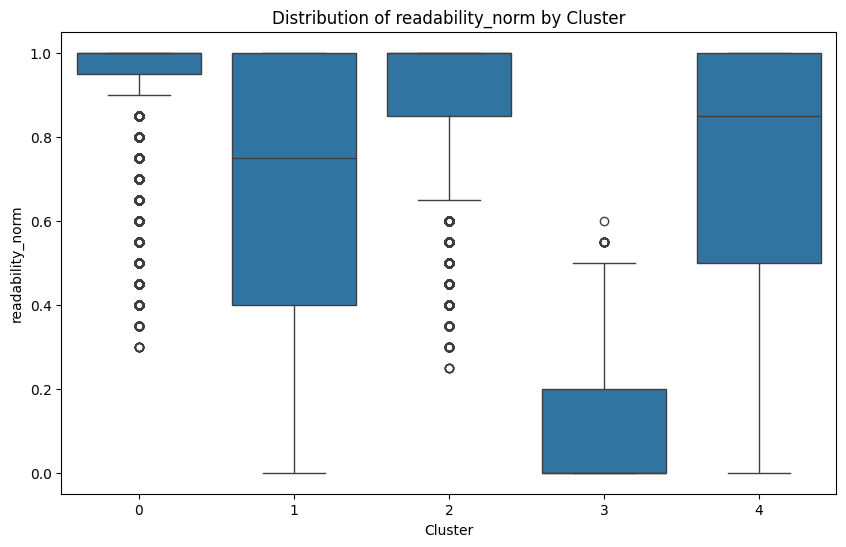

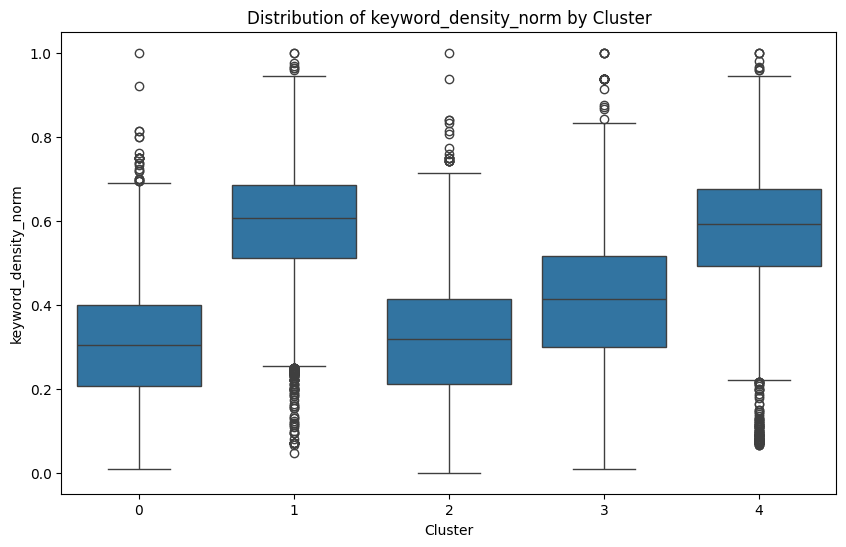

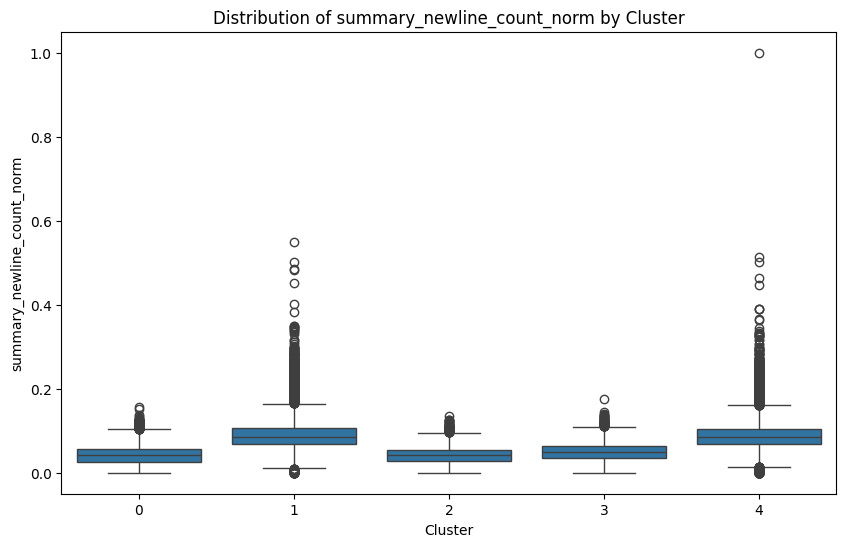

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting boxplots for each numeric feature by cluster
for column in ['summary_length_norm', 'readability_norm', 'keyword_density_norm','summary_newline_count_norm']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=column, data=df)
    plt.title(f'Distribution of {column} by Cluster')
    plt.show()


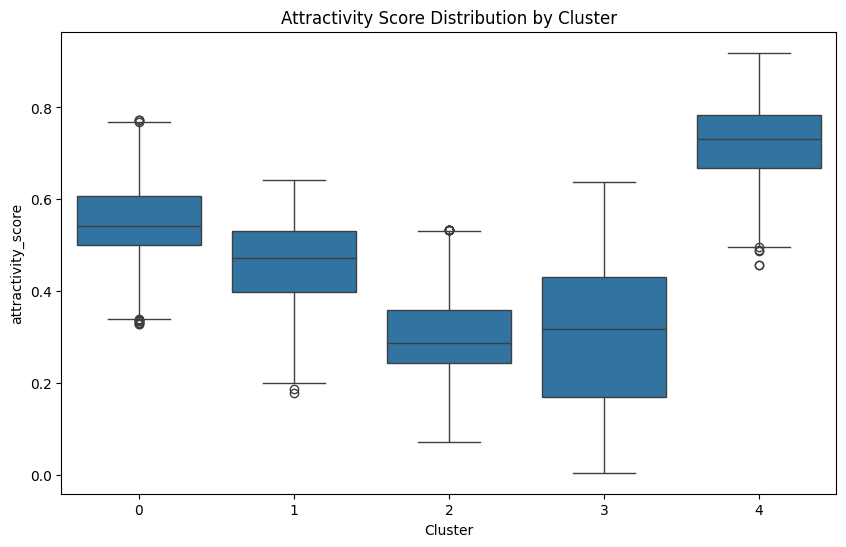

In [131]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='attractivity_score', data=df)
plt.title('Attractivity Score Distribution by Cluster')
plt.show()

In [139]:
df = df[['job_link', 'Cluster']]
df = df[df['Cluster']==4]
cluster4 = spark.createDataFrame(df)


train = job_summary_measures_spk2.join(cluster4, ['job_link']).select('job_summary')

In [140]:
train.count()

22677

In [150]:
train.coalesce(1).write.options(multiline=True, delimiter=',', quote='"', escape='"').csv('summaries_train.csv', header=True, mode='overwrite')